In [75]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib as plt 
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
heart = pd.read_csv("Heart_dataset.csv")

In [3]:
heart

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [4]:
heart = heart.drop(columns=['Unnamed: 0'])

In [5]:
heart

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [6]:
heart['AHD'] = np.where(heart["AHD"] == "Yes", 1, 0) 
heart

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,1
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,1
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,1
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,1


In [7]:
heart['ChestPain'] = heart['ChestPain'].replace(['typical', 'asymptomatic'], [0, 1])

In [8]:
heart['ChestPain'] = heart['ChestPain'].replace(['nonanginal', 'nontypical'], [2, 3])

In [9]:
heart

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,0,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,1,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67,1,1,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41,0,3,130,204,0,2,172,0,1.4,1,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,2,0.0,reversable,1
299,68,1,1,144,193,1,0,141,0,3.4,2,2.0,reversable,1
300,57,1,1,130,131,0,0,115,1,1.2,2,1.0,reversable,1
301,57,0,3,130,236,0,2,174,0,0.0,2,1.0,normal,1


In [10]:
heart['Thal'] = heart['Thal'].replace(['fixed', 'normal', 'reversable'], [0, 1, 2])

In [11]:
heart

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,0,145,233,1,2,150,0,2.3,3,0.0,0.0,0
1,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1.0,1
2,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2.0,1
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1.0,0
4,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,2,0.0,2.0,1
299,68,1,1,144,193,1,0,141,0,3.4,2,2.0,2.0,1
300,57,1,1,130,131,0,0,115,1,1.2,2,1.0,2.0,1
301,57,0,3,130,236,0,2,174,0,0.0,2,1.0,1.0,1


In [12]:
heart.dtypes

Age            int64
Sex            int64
ChestPain      int64
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal         float64
AHD            int64
dtype: object

In [13]:
heart.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [14]:
heart.mean()

Age           54.438944
Sex            0.679868
ChestPain      1.537954
RestBP       131.689769
Chol         246.693069
Fbs            0.148515
RestECG        0.990099
MaxHR        149.607261
ExAng          0.326733
Oldpeak        1.039604
Slope          1.600660
Ca             0.672241
Thal           1.328904
AHD            0.458746
dtype: float64

In [15]:
ca=heart["Ca"].mean()                 #mean of individual  column ca
ca

0.6722408026755853

In [16]:
heart["Ca"].fillna(ca, inplace = True)      # h) replace missing data
heart

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,0,145,233,1,2,150,0,2.3,3,0.000000,0.0,0
1,67,1,1,160,286,0,2,108,1,1.5,2,3.000000,1.0,1
2,67,1,1,120,229,0,2,129,1,2.6,2,2.000000,2.0,1
3,37,1,2,130,250,0,0,187,0,3.5,3,0.000000,1.0,0
4,41,0,3,130,204,0,2,172,0,1.4,1,0.000000,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,2,0.000000,2.0,1
299,68,1,1,144,193,1,0,141,0,3.4,2,2.000000,2.0,1
300,57,1,1,130,131,0,0,115,1,1.2,2,1.000000,2.0,1
301,57,0,3,130,236,0,2,174,0,0.0,2,1.000000,1.0,1


In [17]:
th=heart["Thal"].mean()                 #mean of individual  column ca
th

1.3289036544850499

In [18]:
heart["Thal"].fillna(th, inplace = True)      # h) replace missing data
heart

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,0,145,233,1,2,150,0,2.3,3,0.000000,0.0,0
1,67,1,1,160,286,0,2,108,1,1.5,2,3.000000,1.0,1
2,67,1,1,120,229,0,2,129,1,2.6,2,2.000000,2.0,1
3,37,1,2,130,250,0,0,187,0,3.5,3,0.000000,1.0,0
4,41,0,3,130,204,0,2,172,0,1.4,1,0.000000,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,2,0.000000,2.0,1
299,68,1,1,144,193,1,0,141,0,3.4,2,2.000000,2.0,1
300,57,1,1,130,131,0,0,115,1,1.2,2,1.000000,2.0,1
301,57,0,3,130,236,0,2,174,0,0.0,2,1.000000,1.0,1


In [19]:
heart.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [20]:
heart.duplicated().sum()

0

In [21]:
heart.describe()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,1.537954,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,1.328904,0.458746
std,9.038662,0.467299,0.856053,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,0.582409,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,1.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,2.000000,1.000000


In [22]:
heart.shape


(303, 14)

<Axes: xlabel='Age'>

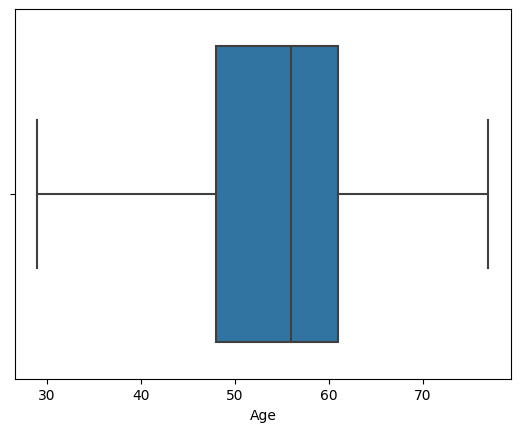

In [23]:
sb.boxplot(data=heart, x="Age")
          

<Axes: xlabel='Sex'>

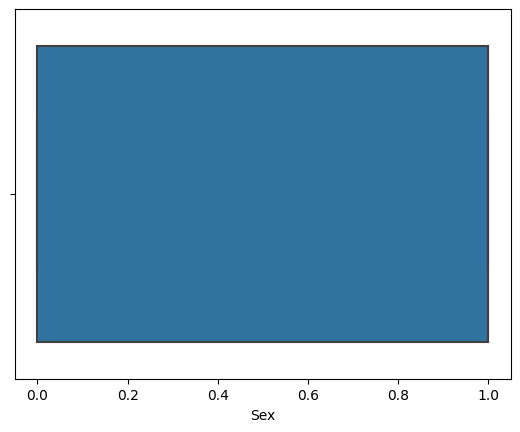

In [24]:
sb.boxplot(data=heart, x="Sex")
          

<Axes: xlabel='ChestPain'>

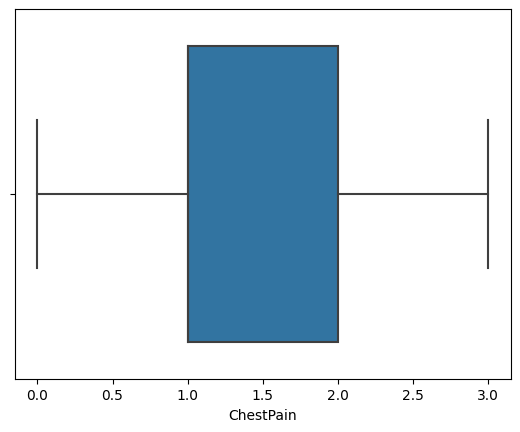

In [25]:
sb.boxplot(data=heart, x="ChestPain")
          

<Axes: xlabel='RestBP'>

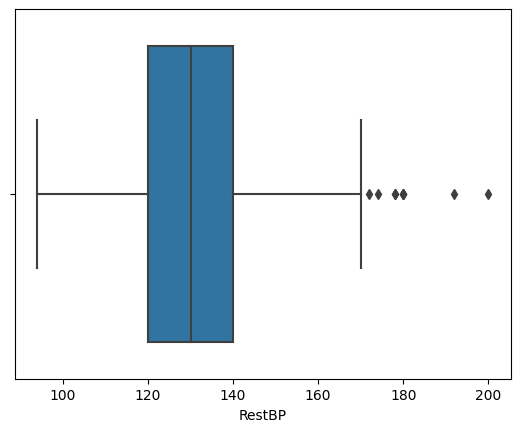

In [26]:
sb.boxplot(data=heart, x="RestBP")
          

<Axes: xlabel='Chol'>

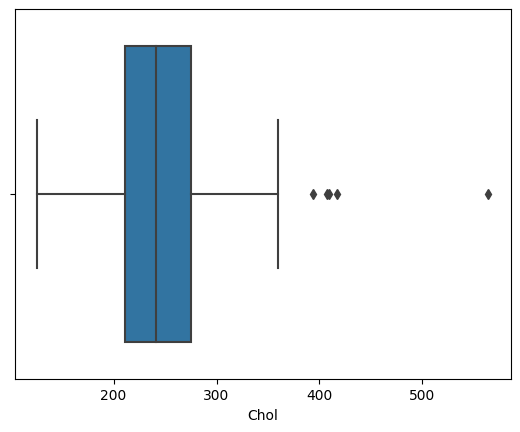

In [27]:
sb.boxplot(data=heart, x="Chol")
          

<Axes: xlabel='Fbs'>

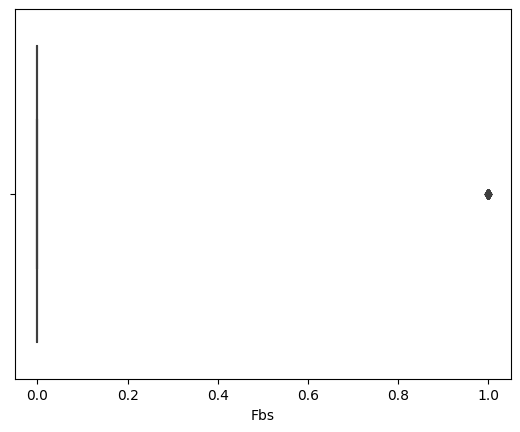

In [28]:
sb.boxplot(data=heart, x="Fbs")
          

<Axes: xlabel='RestECG'>

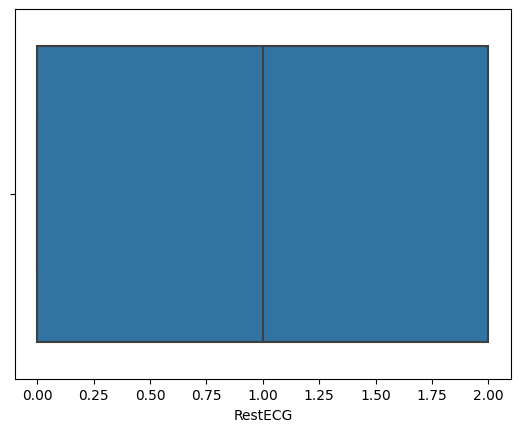

In [29]:
sb.boxplot(data=heart, x="RestECG")
          

<Axes: xlabel='MaxHR'>

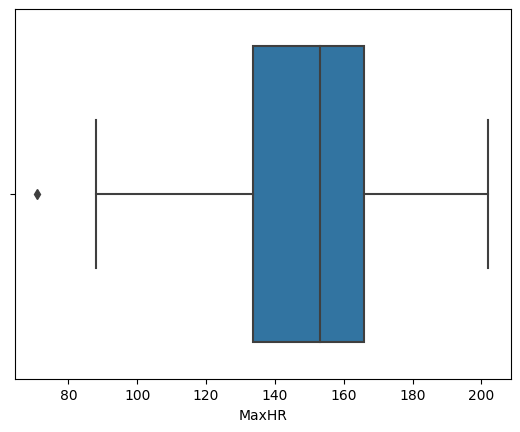

In [30]:
sb.boxplot(data=heart, x="MaxHR")
          

<Axes: xlabel='ExAng'>

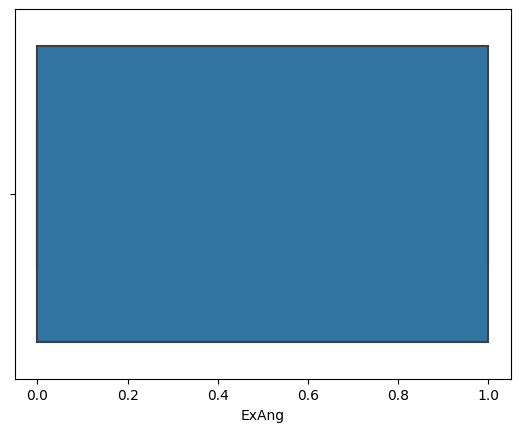

In [31]:
sb.boxplot(data=heart, x="ExAng")
          

<Axes: xlabel='Oldpeak'>

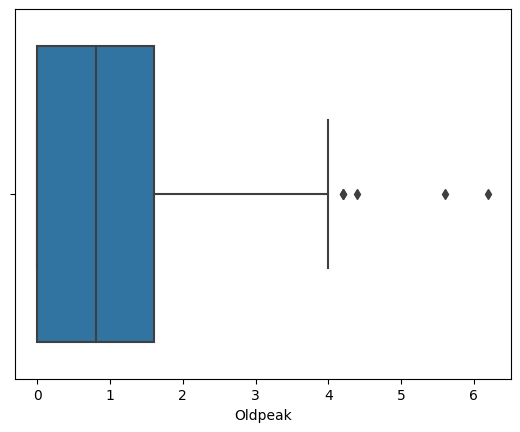

In [32]:
sb.boxplot(data=heart, x="Oldpeak")
          

<Axes: xlabel='Slope'>

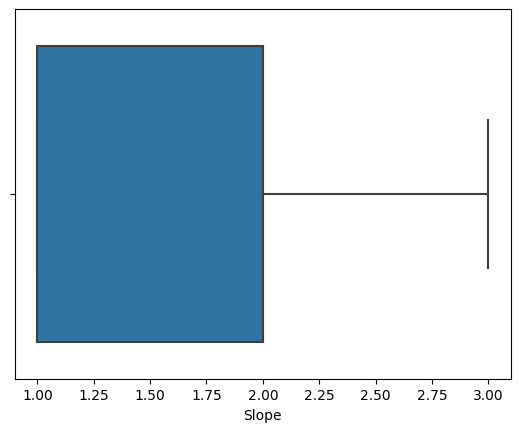

In [33]:
sb.boxplot(data=heart, x="Slope")
          

<Axes: xlabel='Ca'>

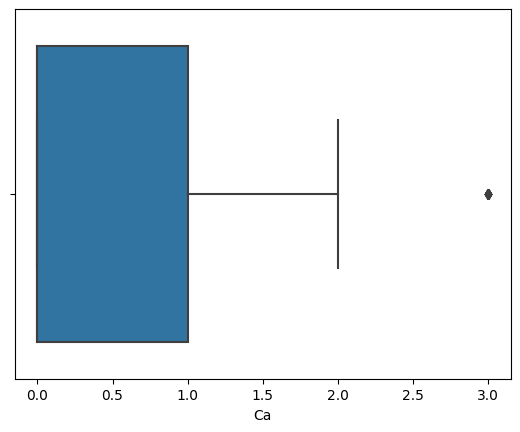

In [34]:
sb.boxplot(data=heart, x="Ca")
          

<Axes: xlabel='Thal'>

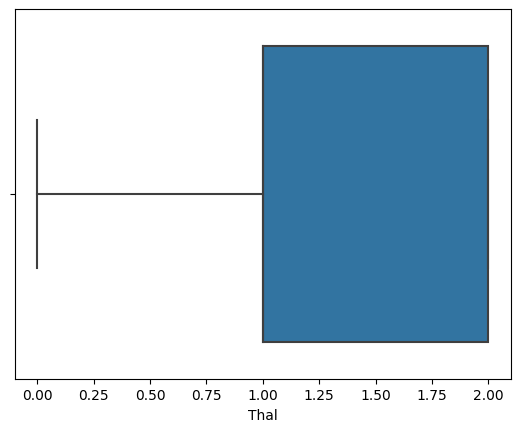

In [35]:
sb.boxplot(data=heart, x="Thal")
          

<Axes: xlabel='AHD'>

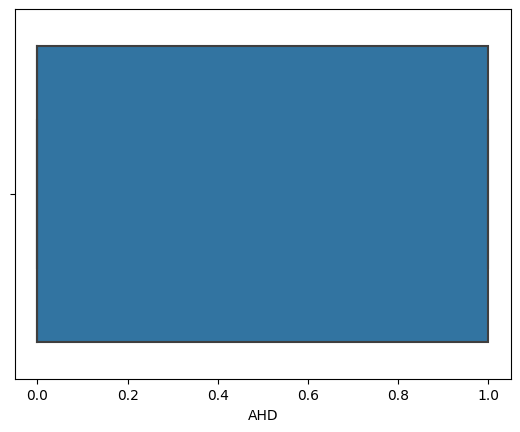

In [36]:
sb.boxplot(data=heart, x="AHD")
          

In [37]:
for x in ['RestBP']:
    q75,q25 = np.percentile(heart.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    heart.loc[heart[x] < min,x] = np.nan
    heart.loc[heart[x] > max,x] = np.nan
          

<Axes: xlabel='RestBP'>

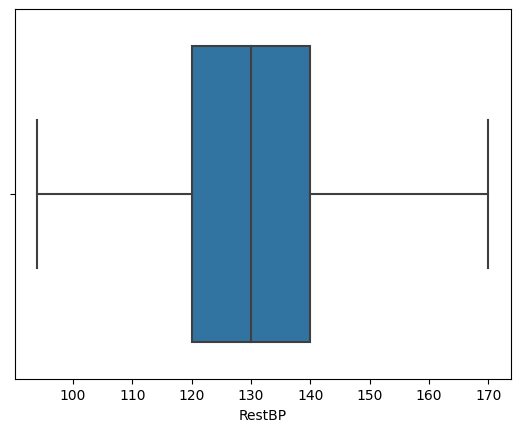

In [38]:
sb.boxplot(data=heart, x="RestBP")

In [39]:
for x in ['Chol']:
    q75,q25 = np.percentile(heart.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    heart.loc[heart[x] < min,x] = np.nan
    heart.loc[heart[x] > max,x] = np.nan

<Axes: xlabel='Chol'>

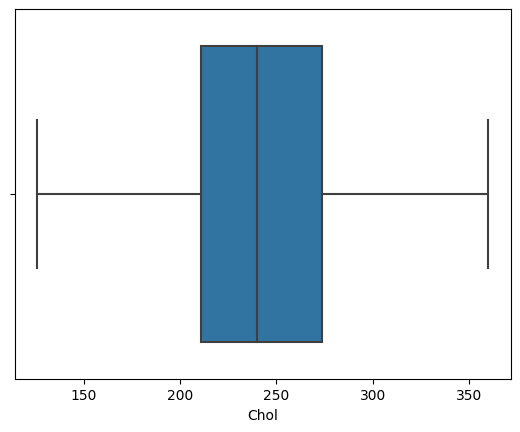

In [40]:
sb.boxplot(data=heart, x="Chol")
          

In [41]:
for x in ['MaxHR']:
    q75,q25 = np.percentile(heart.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    heart.loc[heart[x] < min,x] = np.nan
    heart.loc[heart[x] > max,x] = np.nan

<Axes: xlabel='MaxHR'>

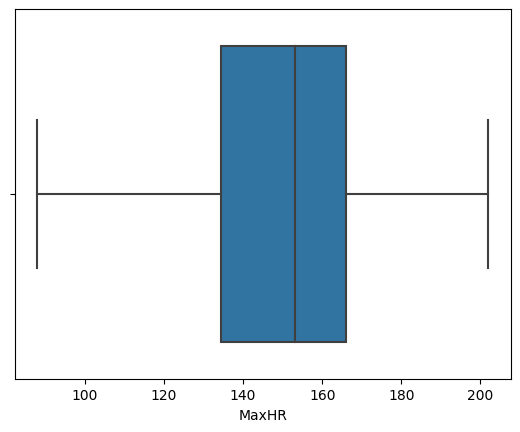

In [42]:
sb.boxplot(data=heart, x="MaxHR")
          

In [43]:
for x in ['Oldpeak']:
    q75,q25 = np.percentile(heart.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    heart.loc[heart[x] < min,x] = np.nan
    heart.loc[heart[x] > max,x] = np.nan

<Axes: xlabel='Oldpeak'>

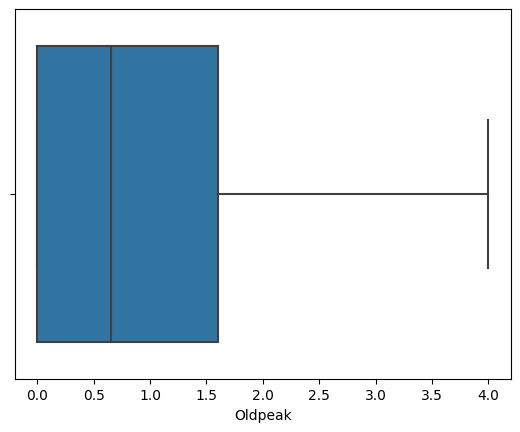

In [44]:
sb.boxplot(data=heart, x="Oldpeak")
          

In [45]:
for x in ['Ca']:
    q75,q25 = np.percentile(heart.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    heart.loc[heart[x] < min,x] = np.nan
    heart.loc[heart[x] > max,x] = np.nan

<Axes: xlabel='Ca'>

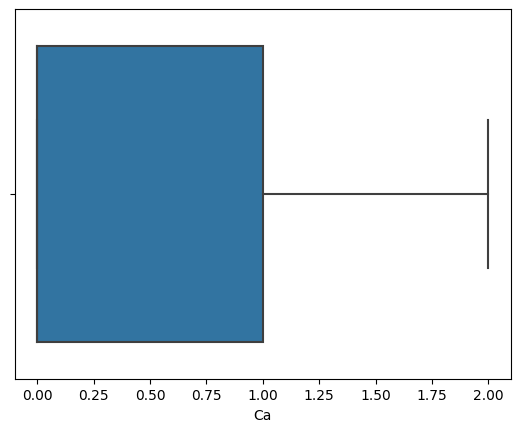

In [46]:
sb.boxplot(data=heart, x="Ca")
          

In [47]:
heart.isnull().sum()

Age           0
Sex           0
ChestPain     0
RestBP        9
Chol          5
Fbs           0
RestECG       0
MaxHR         1
ExAng         0
Oldpeak       5
Slope         0
Ca           20
Thal          0
AHD           0
dtype: int64

In [48]:
data = heart.dropna(axis = 0)

In [49]:
data.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [50]:
data.shape

(268, 14)

In [51]:
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,0,145.0,233.0,1,2,150.0,0,2.3,3,0.0,0.0,0
2,67,1,1,120.0,229.0,0,2,129.0,1,2.6,2,2.0,2.0,1
3,37,1,2,130.0,250.0,0,0,187.0,0,3.5,3,0.0,1.0,0
4,41,0,3,130.0,204.0,0,2,172.0,0,1.4,1,0.0,1.0,0
5,56,1,3,120.0,236.0,0,0,178.0,0,0.8,1,0.0,1.0,0


In [62]:
subset1 = data[data["Age"]>40].iloc[0:30,0:6]

In [53]:
sb2 = data[["RestBP", "Sex", "ChestPain", "Age", "Ca", "Thal", "AHD"]]


In [63]:
subset1

,Age,Sex,ChestPain,RestBP,Chol,Fbs
0,63,1,0,145.0,233.0,1
2,67,1,1,120.0,229.0,0
4,41,0,3,130.0,204.0,0
5,56,1,3,120.0,236.0,0
6,62,0,1,140.0,268.0,0
7,57,0,1,120.0,354.0,0
8,63,1,1,130.0,254.0,0
9,53,1,1,140.0,203.0,1
10,57,1,1,140.0,192.0,0
11,56,0,3,140.0,294.0,0


In [64]:
subset2 = data[data["RestBP"]<140].iloc[0:40,3:9]

In [65]:
subset2

,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng
2,120.0,229.0,0,2,129.0,1
3,130.0,250.0,0,0,187.0,0
4,130.0,204.0,0,2,172.0,0
5,120.0,236.0,0,0,178.0,0
7,120.0,354.0,0,0,163.0,1
8,130.0,254.0,0,2,147.0,0
12,130.0,256.0,1,2,142.0,1
13,120.0,263.0,0,0,173.0,0
16,110.0,229.0,0,0,168.0,0
18,130.0,275.0,0,0,139.0,0


In [66]:
subset1.merge(subset2,how="inner")

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng
0,67,1,1,120.0,229.0,0,2,129.0,1
1,41,0,3,130.0,204.0,0,2,172.0,0
2,56,1,3,120.0,236.0,0,0,178.0,0
3,57,0,1,120.0,354.0,0,0,163.0,1
4,63,1,1,130.0,254.0,0,2,147.0,0
5,56,1,2,130.0,256.0,1,2,142.0,1
6,44,1,3,120.0,263.0,0,0,173.0,0
7,48,1,3,110.0,229.0,0,0,168.0,0
8,48,0,2,130.0,275.0,0,0,139.0,0
9,49,1,3,130.0,266.0,0,0,171.0,0


In [67]:
subset1.merge(subset2,how="cross")

,Age,Sex,ChestPain,RestBP_x,Chol_x,Fbs_x,RestBP_y,Chol_y,Fbs_y,RestECG,MaxHR,ExAng
0,63,1,0,145.0,233.0,1,120.0,229.0,0,2,129.0,1
1,63,1,0,145.0,233.0,1,130.0,250.0,0,0,187.0,0
2,63,1,0,145.0,233.0,1,130.0,204.0,0,2,172.0,0
3,63,1,0,145.0,233.0,1,120.0,236.0,0,0,178.0,0
4,63,1,0,145.0,233.0,1,120.0,354.0,0,0,163.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,59,1,1,135.0,234.0,0,125.0,213.0,0,2,125.0,1
1196,59,1,1,135.0,234.0,0,130.0,305.0,0,0,142.0,1
1197,59,1,1,135.0,234.0,0,135.0,304.0,1,0,170.0,0
1198,59,1,1,135.0,234.0,0,120.0,188.0,0,0,113.0,0


In [68]:
pd.concat([subset1,subset2])

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng
0,63.0,1.0,0.0,145.0,233.0,1,NaN,NaN,NaN
2,67.0,1.0,1.0,120.0,229.0,0,NaN,NaN,NaN
4,41.0,0.0,3.0,130.0,204.0,0,NaN,NaN,NaN
5,56.0,1.0,3.0,120.0,236.0,0,NaN,NaN,NaN
6,62.0,0.0,1.0,140.0,268.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
59,NaN,NaN,NaN,125.0,213.0,0,2.0,125.0,1.0
60,NaN,NaN,NaN,130.0,305.0,0,0.0,142.0,1.0
63,NaN,NaN,NaN,135.0,304.0,1,0.0,170.0,0.0
64,NaN,NaN,NaN,120.0,188.0,0,0.0,113.0,0.0


In [69]:
pd.melt(subset1,id_vars="Age")

,Age,variable,value
0,63,Sex,1.0
1,67,Sex,1.0
2,41,Sex,0.0
3,56,Sex,1.0
4,62,Sex,0.0
...,...,...,...
145,43,Fbs,0.0
146,69,Fbs,0.0
147,60,Fbs,1.0
148,64,Fbs,0.0


In [70]:
pd.pivot_table(data,index="RestECG",values="AHD",columns="ChestPain",aggfunc="sum")

ChestPain,0,1,2,3
RestECG,,,,
0,4.0,34.0,8.0,2.0
1,NaN,1.0,0.0,NaN
2,3.0,50.0,6.0,5.0


In [71]:
data.corr()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
Age,1.000000,-0.082313,-0.167917,0.273692,0.144322,0.112548,0.127263,-0.399756,0.080525,0.200569,0.142068,0.376330,0.063050,0.197965
Sex,-0.082313,1.000000,-0.162160,-0.003163,-0.145834,0.070901,0.034258,-0.046418,0.179089,0.167998,0.070904,0.096271,0.252077,0.316289
ChestPain,-0.167917,-0.162160,1.000000,-0.149945,0.020044,-0.021731,-0.159273,0.260866,-0.324184,-0.327163,-0.225903,-0.213618,-0.164349,-0.367801
RestBP,0.273692,-0.003163,-0.149945,1.000000,0.100947,0.129918,0.143882,-0.031096,-0.021488,0.142862,0.048212,0.052188,-0.013388,0.092991
Chol,0.144322,-0.145834,0.020044,0.100947,1.000000,-0.024842,0.115783,0.002969,0.049062,-0.020917,-0.054274,0.084114,0.076371,0.092157
Fbs,0.112548,0.070901,-0.021731,0.129918,-0.024842,1.000000,0.073069,-0.010502,0.024584,0.021831,0.096725,0.108020,-0.061952,0.027863
RestECG,0.127263,0.034258,-0.159273,0.143882,0.115783,0.073069,1.000000,-0.107348,0.103136,0.101184,0.134971,0.077498,-0.048357,0.159887
MaxHR,-0.399756,-0.046418,0.260866,-0.031096,0.002969,-0.010502,-0.107348,1.000000,-0.411041,-0.333459,-0.369553,-0.241072,-0.144927,-0.393276
ExAng,0.080525,0.179089,-0.324184,-0.021488,0.049062,0.024584,0.103136,-0.411041,1.000000,0.347531,0.275077,0.182204,0.253427,0.432982
Oldpeak,0.200569,0.167998,-0.327163,0.142862,-0.020917,0.021831,0.101184,-0.333459,0.347531,1.000000,0.527522,0.276203,0.179483,0.433068


In [72]:
data

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,0,145.0,233.0,1,2,150.0,0,2.3,3,0.000000,0.0,0
2,67,1,1,120.0,229.0,0,2,129.0,1,2.6,2,2.000000,2.0,1
3,37,1,2,130.0,250.0,0,0,187.0,0,3.5,3,0.000000,1.0,0
4,41,0,3,130.0,204.0,0,2,172.0,0,1.4,1,0.000000,1.0,0
5,56,1,3,120.0,236.0,0,0,178.0,0,0.8,1,0.000000,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110.0,264.0,0,0,132.0,0,1.2,2,0.000000,2.0,1
299,68,1,1,144.0,193.0,1,0,141.0,0,3.4,2,2.000000,2.0,1
300,57,1,1,130.0,131.0,0,0,115.0,1,1.2,2,1.000000,2.0,1
301,57,0,3,130.0,236.0,0,2,174.0,0,0.0,2,1.000000,1.0,1


<Axes: xlabel='Age', ylabel='Chol'>

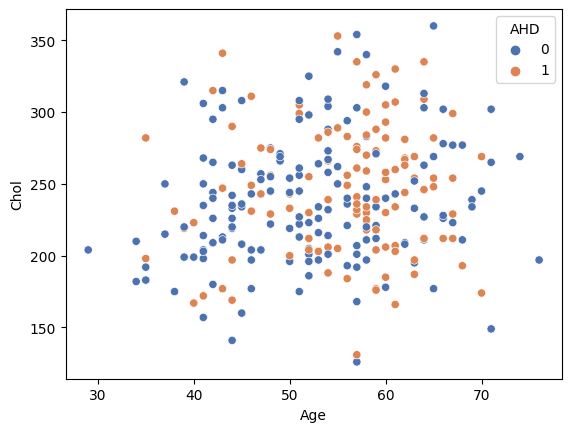

In [78]:
sb.scatterplot(data=data, x='Age', y='Chol', hue="AHD",palette="deep")

<Axes: xlabel='AHD', ylabel='count'>

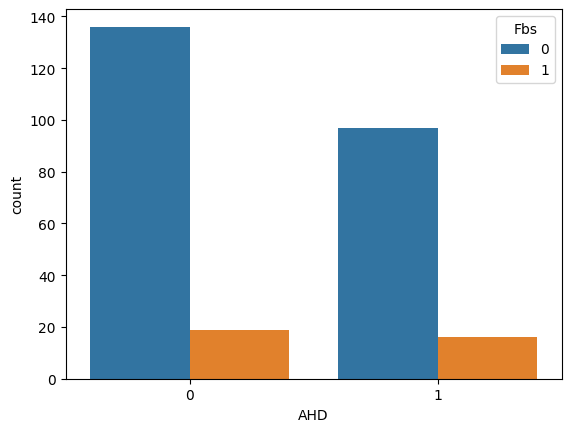

In [79]:
sb.countplot(data=data,x="AHD",hue="Fbs")

<Axes: >

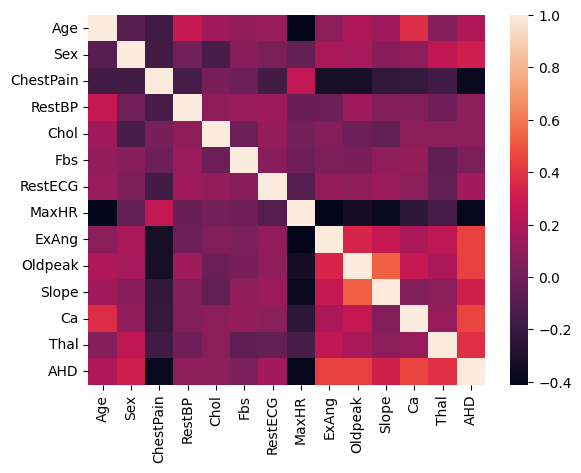

In [82]:
c = data.corr()
sb.heatmap(c)

<Axes: >

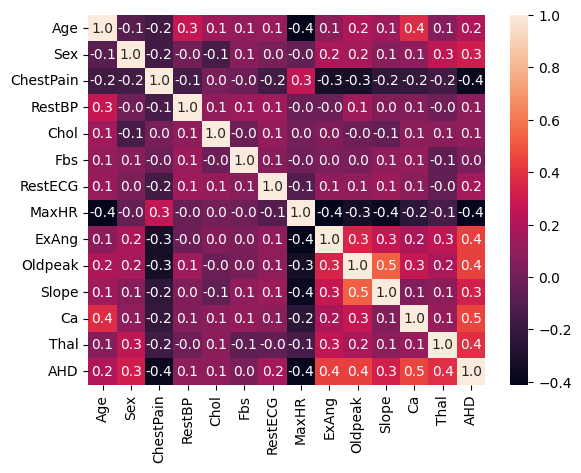

In [60]:
sb.heatmap(c, annot = True, fmt = '0.1f')

In [83]:
data.corr()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
Age,1.000000,-0.082313,-0.167917,0.273692,0.144322,0.112548,0.127263,-0.399756,0.080525,0.200569,0.142068,0.376330,0.063050,0.197965
Sex,-0.082313,1.000000,-0.162160,-0.003163,-0.145834,0.070901,0.034258,-0.046418,0.179089,0.167998,0.070904,0.096271,0.252077,0.316289
ChestPain,-0.167917,-0.162160,1.000000,-0.149945,0.020044,-0.021731,-0.159273,0.260866,-0.324184,-0.327163,-0.225903,-0.213618,-0.164349,-0.367801
RestBP,0.273692,-0.003163,-0.149945,1.000000,0.100947,0.129918,0.143882,-0.031096,-0.021488,0.142862,0.048212,0.052188,-0.013388,0.092991
Chol,0.144322,-0.145834,0.020044,0.100947,1.000000,-0.024842,0.115783,0.002969,0.049062,-0.020917,-0.054274,0.084114,0.076371,0.092157
Fbs,0.112548,0.070901,-0.021731,0.129918,-0.024842,1.000000,0.073069,-0.010502,0.024584,0.021831,0.096725,0.108020,-0.061952,0.027863
RestECG,0.127263,0.034258,-0.159273,0.143882,0.115783,0.073069,1.000000,-0.107348,0.103136,0.101184,0.134971,0.077498,-0.048357,0.159887
MaxHR,-0.399756,-0.046418,0.260866,-0.031096,0.002969,-0.010502,-0.107348,1.000000,-0.411041,-0.333459,-0.369553,-0.241072,-0.144927,-0.393276
ExAng,0.080525,0.179089,-0.324184,-0.021488,0.049062,0.024584,0.103136,-0.411041,1.000000,0.347531,0.275077,0.182204,0.253427,0.432982
Oldpeak,0.200569,0.167998,-0.327163,0.142862,-0.020917,0.021831,0.101184,-0.333459,0.347531,1.000000,0.527522,0.276203,0.179483,0.433068


In [84]:
data=data.drop("Fbs",axis=1)

In [85]:
X = data.iloc[:,0:11]

In [86]:
X

,Age,Sex,ChestPain,RestBP,Chol,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
0,63,1,0,145.0,233.0,2,150.0,0,2.3,3,0.000000
2,67,1,1,120.0,229.0,2,129.0,1,2.6,2,2.000000
3,37,1,2,130.0,250.0,0,187.0,0,3.5,3,0.000000
4,41,0,3,130.0,204.0,2,172.0,0,1.4,1,0.000000
5,56,1,3,120.0,236.0,0,178.0,0,0.8,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110.0,264.0,0,132.0,0,1.2,2,0.000000
299,68,1,1,144.0,193.0,0,141.0,0,3.4,2,2.000000
300,57,1,1,130.0,131.0,0,115.0,1,1.2,2,1.000000
301,57,0,3,130.0,236.0,2,174.0,0,0.0,2,1.000000


In [88]:
Y = data["AHD"].values

In [89]:
Y

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0])

In [90]:
X_train,X_test,Y_train,Y_test = tts(X,Y)

In [91]:
X_train

,Age,Sex,ChestPain,RestBP,Chol,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
297,57,0,1,140.0,241.0,0,123.0,1,0.2,2,0.0
68,59,1,1,170.0,326.0,2,140.0,1,3.4,3,0.0
143,64,1,2,125.0,309.0,0,131.0,1,1.8,2,0.0
299,68,1,1,144.0,193.0,0,141.0,0,3.4,2,2.0
264,61,1,1,138.0,166.0,2,125.0,1,3.6,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...
208,55,1,3,130.0,262.0,0,155.0,0,0.0,1,0.0
216,46,0,3,105.0,204.0,0,172.0,0,0.0,1,0.0
292,44,1,1,120.0,169.0,0,144.0,1,2.8,3,0.0
128,44,1,3,120.0,220.0,0,170.0,0,0.0,1,0.0


In [92]:
X_test

,Age,Sex,ChestPain,RestBP,Chol,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
144,58,1,2,105.0,240.0,2,154.0,1,0.6,2,0.000000
256,67,0,1,106.0,223.0,0,142.0,0,0.3,1,2.000000
151,42,0,1,102.0,265.0,2,122.0,0,0.6,2,0.000000
287,58,1,3,125.0,220.0,0,144.0,0,0.4,2,0.672241
109,39,1,1,118.0,219.0,0,140.0,0,1.2,2,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
7,57,0,1,120.0,354.0,0,163.0,1,0.6,1,0.000000
273,71,0,1,112.0,149.0,0,125.0,0,1.6,2,0.000000
210,37,0,2,120.0,215.0,0,170.0,0,0.0,1,0.000000
47,50,1,1,150.0,243.0,2,128.0,0,2.6,2,0.000000


In [93]:
Y_train

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1])

In [94]:
Y_test

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0])

In [95]:
lrm = LogisticRegression(max_iter=1000).fit(X_train,Y_train)

In [96]:
Y_pred = lrm.predict(X_test)

In [97]:
metrics.confusion_matrix(Y_test,Y_pred)

array([[34,  5],
       [ 8, 20]])

In [98]:
metrics.accuracy_score(Y_test,Y_pred)

0.8059701492537313

In [99]:
metrics.recall_score(Y_test,Y_pred)

0.7142857142857143

In [100]:
metrics.precision_score(Y_test,Y_pred)

0.8

In [103]:
df1 = pd.DataFrame({
    "Age":[63],
    "Sex":[1],
    "ChestPain":[1],
    "RestBP":[145],
    "RestECG":[2],
    "MaxHR":[150],
    "ExAng":[0],
    "Oldpeak":[2.3],
    "Slope":[3],
    "Ca":[0.0],
    "Thal":[1]
})